# Import the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [ ]:
data = pd.read_csv('/content/data.csv', encoding = 'unicode_escape')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Get Basic Informations

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
data[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


The descriptive statistics reveal significant variations in Quantity and UnitPrice, with noticeable outliers. Negative values in Quantity and UnitPrice likely stem from product returns or data entry errors, necessitating data cleaning. Price distribution is highly dispersed, with some high-priced products potentially being premium items or misrecorded entries.

In [ ]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


# Cleaning Dataset

In [ ]:
# Convert the InvoiceDate column to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# Filling Null Descriptions Using Mode of StockCode and Dropping Remaining Missing Values

In [ ]:
non_repeated_values = data[data['Description'].isnull()]['StockCode']

for i in non_repeated_values:

  mode_description = data[data['StockCode'] == i]['Description'].mode()

  if not mode_description.empty:
    # Fill null 'Description' values with the mode value

    data.loc[(data['StockCode'] == i) & (data['Description'].isnull()), 'Description'] = mode_description[0]

data.dropna(subset=['Description'], inplace=True)

This script identifies rows where the 'Description' column has null values. For each StockCode with missing descriptions, the script calculates the mode (most frequent value) of the 'Description' for that specific StockCode. If a valid mode is found, the missing values are filled with the mode. After this process, rows still containing null values in the 'Description' column are dropped.

# Dropp Null Values in CustomerID Column

In [ ]:
data.dropna(subset = ['CustomerID'], inplace =True)

In [ ]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
data.shape

(406829, 8)

# Checking Duplicate Values

In [ ]:
data.duplicated().sum()

np.int64(5225)

In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
data.duplicated().sum()

np.int64(0)

# Handling the negative values and Outliers in UnitPrice and Quantity Columns

## UnitPrice

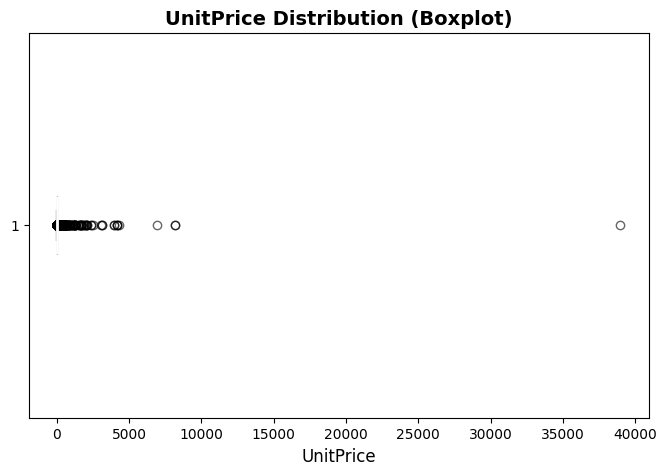

In [ ]:
# Create a boxplot for UnitPrice column
plt.figure(figsize=(8, 5))  # Adjust figure size for better readability
plt.boxplot(data['UnitPrice'], vert=False, patch_artist=True,
            boxprops=dict(facecolor="darkcyan", color="black"),
            medianprops=dict(color="white", linewidth=2),
            whiskerprops=dict(color="black", linewidth=1.5),
            capprops=dict(color="black", linewidth=1.5),
            flierprops=dict(marker="o", color="red", alpha=0.6))

# Set title and labels
plt.title('UnitPrice Distribution (Boxplot)', fontsize=14, fontweight='bold')
plt.xlabel('UnitPrice', fontsize=12)

# Show the plot
plt.show()

In [ ]:
# Calculate the Interquartile Range (IQR) for UnitPrice
q1 = data['UnitPrice'].quantile(.25)
q3 = data['UnitPrice'].quantile(.75)
IQR = q3 - q1

# Define lower and upper bounds for outlier detection
lowerbound = q1 - 1.5 * IQR
upperbound = q3 + 1.5 * IQR

# Filter the dataset to remove outliers
data=data[(data['UnitPrice'] > lowerbound) & (data['UnitPrice'] < upperbound)]

This script calculates the IQR for the 'UnitPrice' column, which is used to detect and remove outliers. The IQR is calculated by determining the first (Q1) and third (Q3) quartiles of 'UnitPrice', and then computing the lower and upper bounds using the formula:

- Lower Bound = Q1 - 1.5 * IQR

- Upper Bound = Q3 + 1.5 * IQR
Data points outside this range are removed, ensuring only normal-range data remains.

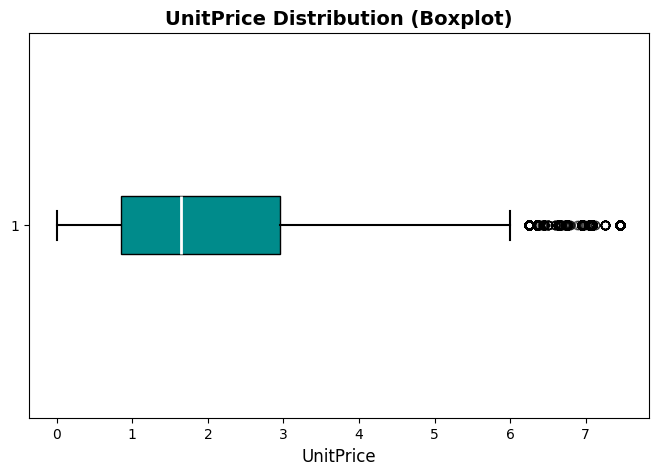

In [ ]:
# Create a boxplot for UnitPrice column
plt.figure(figsize=(8, 5))  # Adjust figure size for better readability
plt.boxplot(data['UnitPrice'], vert=False, patch_artist=True,
            boxprops=dict(facecolor="darkcyan", color="black"),
            medianprops=dict(color="white", linewidth=2),
            whiskerprops=dict(color="black", linewidth=1.5),
            capprops=dict(color="black", linewidth=1.5),
            flierprops=dict(marker="o", color="red", alpha=0.6))

# Set title and labels
plt.title('UnitPrice Distribution (Boxplot)', fontsize=14, fontweight='bold')
plt.xlabel('UnitPrice', fontsize=12)

# Show the plot
plt.show()

## Quantity

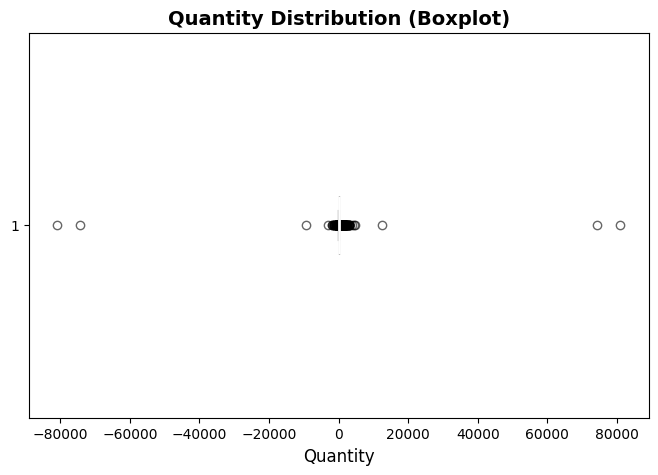

In [ ]:
# Create a boxplot for Quantity column
plt.figure(figsize=(8, 5))  # Adjust figure size for better readability
plt.boxplot(data['Quantity'], vert=False, patch_artist=True,
            boxprops=dict(facecolor="darkcyan", color="black"),
            medianprops=dict(color="white", linewidth=2),
            whiskerprops=dict(color="black", linewidth=1.5),
            capprops=dict(color="black", linewidth=1.5),
            flierprops=dict(marker="o", color="red", alpha=0.6))

# Set title and labels
plt.title('Quantity Distribution (Boxplot)', fontsize=14, fontweight='bold')
plt.xlabel('Quantity', fontsize=12)

# Show the plot
plt.show()

In [ ]:
# Calculate the Interquartile Range (IQR) for Quantity
q1 = data['Quantity'].quantile(0.25)
q3 = data['Quantity'].quantile(0.75)
IQR = q3 - q1

# Define lower and upper bounds for outlier detection
lowerbound = q1 - 1.5 * IQR
upperbound = q3 + 1.5 * IQR

# Menghapus outlier (termasuk semua nilai negatif)
data = data[(data['Quantity'] >= 0) & (data['Quantity'] >= lowerbound) & (data['Quantity'] <= upperbound)]

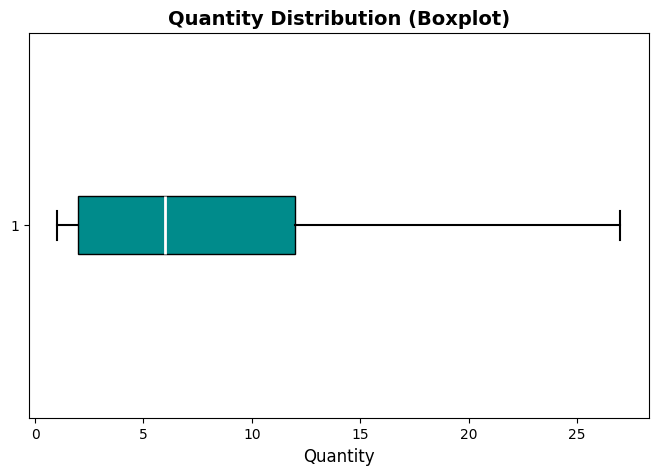

In [ ]:
# Create a boxplot for Quantity column
plt.figure(figsize=(8, 5))  # Adjust figure size for better readability
plt.boxplot(data['Quantity'], vert=False, patch_artist=True,
            boxprops=dict(facecolor="darkcyan", color="black"),
            medianprops=dict(color="white", linewidth=2),
            whiskerprops=dict(color="black", linewidth=1.5),
            capprops=dict(color="black", linewidth=1.5),
            flierprops=dict(marker="o", color="red", alpha=0.6))

# Set title and labels
plt.title('Quantity Distribution (Boxplot)', fontsize=14, fontweight='bold')
plt.xlabel('Quantity', fontsize=12)

# Show the plot
plt.show()

In [ ]:
data[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,332691.000000,332691.000000
mean,7.559086,2.184860
std,6.779287,1.531618
min,1.000000,0.000000
25%,2.000000,1.250000
50%,6.000000,1.650000
75%,12.000000,2.950000
max,27.000000,7.460000


# Add Columns that Needed

In [ ]:
data['Revenue'] = data['UnitPrice'] * data['Quantity']

In [ ]:
# Add additional columns to the dataset containing more detailed time-related information such as year, month, quarter which will be used for further analysis
data['MonthYear'] = data['InvoiceDate'].dt.to_period('M')

L = ['year', 'month', 'quarter']
data = data.join(pd.concat((getattr(data['InvoiceDate'].dt, i).rename(i) for i in L), axis = 1))

In [ ]:
# Add a new column named yearmonth by combining the year and month columns from InvoiceDate.
data.insert(loc=2, column='yearmonth', value=data['InvoiceDate'].map(lambda x: 100*x.year + x.month))

In [ ]:
data.head()

,InvoiceNo,StockCode,yearmonth,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,MonthYear,year,month,quarter
0,536365,85123A,201012,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010,12,4
1,536365,71053,201012,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,4
2,536365,84406B,201012,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010,12,4
3,536365,84029G,201012,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,4
4,536365,84029E,201012,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,4


# Exploratory Data Analyst (EDA)

In [ ]:
# Consolidating number of sales made by customer for each country
sales_per_cust = data.groupby(['CustomerID', 'Country'], as_index = False)['InvoiceNo'].count().sort_values(by = 'InvoiceNo', ascending = False)
sales_per_cust.columns = ['CustomerID', 'Country', 'NumberOfSales']
sales_per_cust.head()

,CustomerID,Country,NumberOfSales
3891,17841.0,United Kingdom,7204
1835,14911.0,EIRE,4472
1258,14096.0,United Kingdom,4415
330,12748.0,United Kingdom,4044
1621,14606.0,United Kingdom,2422


This script groups the data by 'CustomerID' and 'Country' to count the number of sales made by each customer in each country. The results are sorted by the number of sales (InvoiceNo), highlighting customers with the highest number of transactions. This helps to understand sales distribution across customers and countries.

# Revenue Analysis

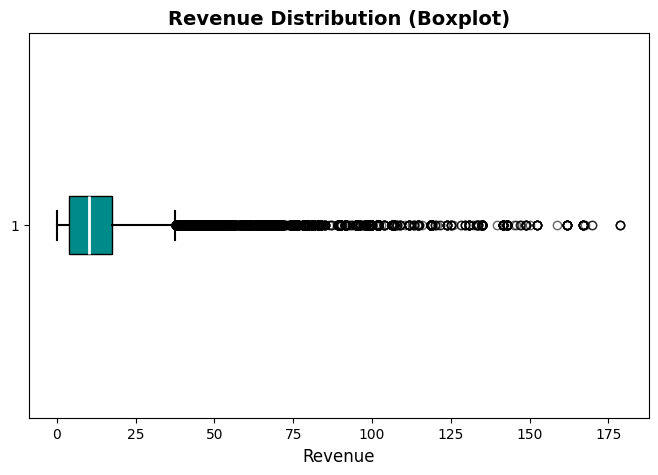

In [ ]:
# Create a boxplot for Revenue with customized color
plt.figure(figsize=(8, 5))  # Adjust figure size for better readability
plt.boxplot(data['Revenue'], vert=False, patch_artist=True,
            boxprops=dict(facecolor="darkcyan", color="black"),
            medianprops=dict(color="white", linewidth=2),
            whiskerprops=dict(color="black", linewidth=1.5),
            capprops=dict(color="black", linewidth=1.5),
            flierprops=dict(marker="o", color="red", alpha=0.6))

# Set title and labels
plt.title('Revenue Distribution (Boxplot)', fontsize=14, fontweight='bold')
plt.xlabel('Revenue', fontsize=12)

# Show the plot
plt.show()

As illustrated in the boxplot, several significant outliers are present on the right side of the distribution. These outliers correspond to revenue values that are substantially higher than the majority of the other data points.

Outliers can distort the accuracy of key statistical measures, such as the mean and standard deviation, leading to potential misinterpretations of business performance. For instance, an inflated average revenue due to the presence of outliers may create a misleading perception that the business is performing better than it actually is.

When business decisions are based on data that contains outliers, there is a risk that these decisions may be flawed or even counterproductive. For example, the influence of exceptionally high revenue from outliers could result in overly ambitious investments, while the actual business performance may not justify such actions.

In [ ]:
# Calculate the Interquartile Range (IQR) for Revenue
q1 = data['Revenue'].quantile(0.25)
q3 = data['Revenue'].quantile(0.75)
IQR = q3 - q1

# Define lower and upper bounds for outlier detection
lowerbound = q1 - 1.5 * IQR
upperbound = q3 + 1.5 * IQR

# Filter dataset to remove extreme outliers
data = data[(data['Revenue'] >= lowerbound) & (data['Revenue'] <= upperbound)]

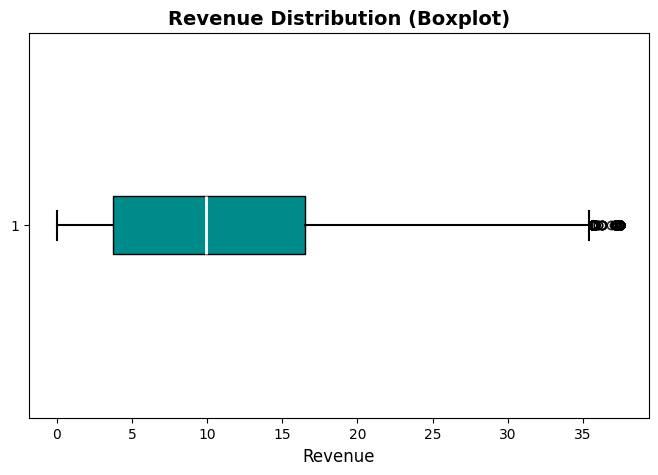

In [ ]:
# Create a boxplot for Revenue with customized color
plt.figure(figsize=(8, 5))  # Adjust figure size for better readability
plt.boxplot(data['Revenue'], vert=False, patch_artist=True,
            boxprops=dict(facecolor="darkcyan", color="black"),
            medianprops=dict(color="white", linewidth=2),
            whiskerprops=dict(color="black", linewidth=1.5),
            capprops=dict(color="black", linewidth=1.5),
            flierprops=dict(marker="o", color="red", alpha=0.6))

# Set title and labels
plt.title('Revenue Distribution (Boxplot)', fontsize=14, fontweight='bold')
plt.xlabel('Revenue', fontsize=12)

# Show the plot
plt.show()

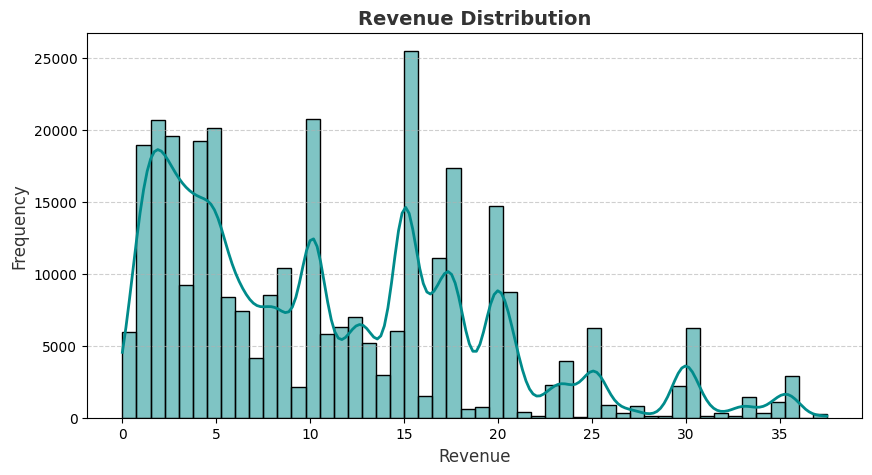

In [ ]:
# Revenue Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['Revenue'], bins=50, kde=True, color='#008B8B', line_kws={'color': '#FF8C00', 'linewidth': 2})
plt.title('Revenue Distribution', fontsize=14, fontweight='bold', color='#333333')
plt.xlabel('Revenue', fontsize=12, color='#333333')
plt.ylabel('Frequency', fontsize=12, color='#333333')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

The revenue distribution follows a right-skewed pattern, where the majority of transactions generate relatively low revenue, while a smaller subset contributes to significantly higher values. This trend is common in e-commerce, where most customers make small to moderate purchases, whereas a select group of high-value customers accounts for a disproportionate share of total revenue.

The presence of multiple peaks in the histogram may indicate pricing tiers, distinct customer purchasing behaviors, or the influence of promotional campaigns. These peaks could correspond to specific product price points or bulk purchasing trends among certain customer segments.

# Period Analysis

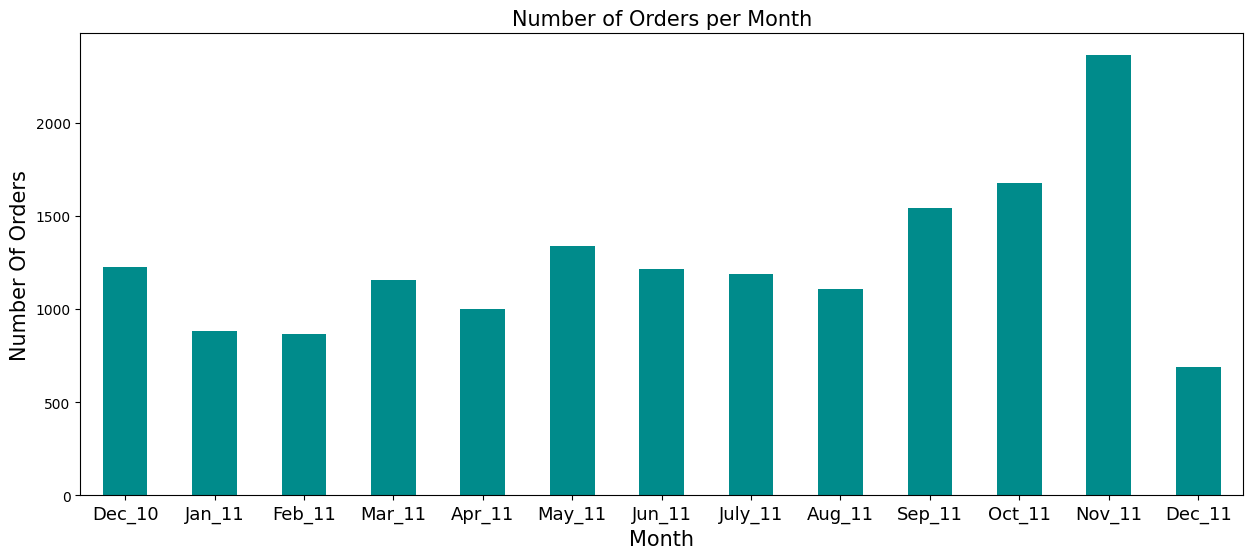

In [ ]:
# Number of order per month
ax = data.groupby('InvoiceNo')['yearmonth'].unique().value_counts().sort_index().plot(kind = 'bar', color = 'DarkCyan', figsize = (15,6))
ax.set_xlabel('Month', fontsize = 15)
ax.set_ylabel('Number Of Orders', fontsize = 15)
ax.set_title('Number of Orders per Month', fontsize =15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

The bar chart illustrates the monthly trend in the number of orders over a one-year period. A clear upward trend is observed, particularly in the last quarter of the year, with November 2011 recording the highest number of orders. This spike is likely driven by seasonal promotions, holiday shopping behavior, or marketing campaigns that encourage higher customer spending.

The beginning of the year (January – February 2011) shows relatively lower order volumes, possibly due to a post-holiday sales decline or reduced consumer spending. Meanwhile, the sharp drop in December 2011 is explained by the fact that the dataset only includes transactions up to December 9, 2011, meaning the data for the rest of the month is missing. This suggests that the actual number of orders for December could have been significantly higher if complete data were available.

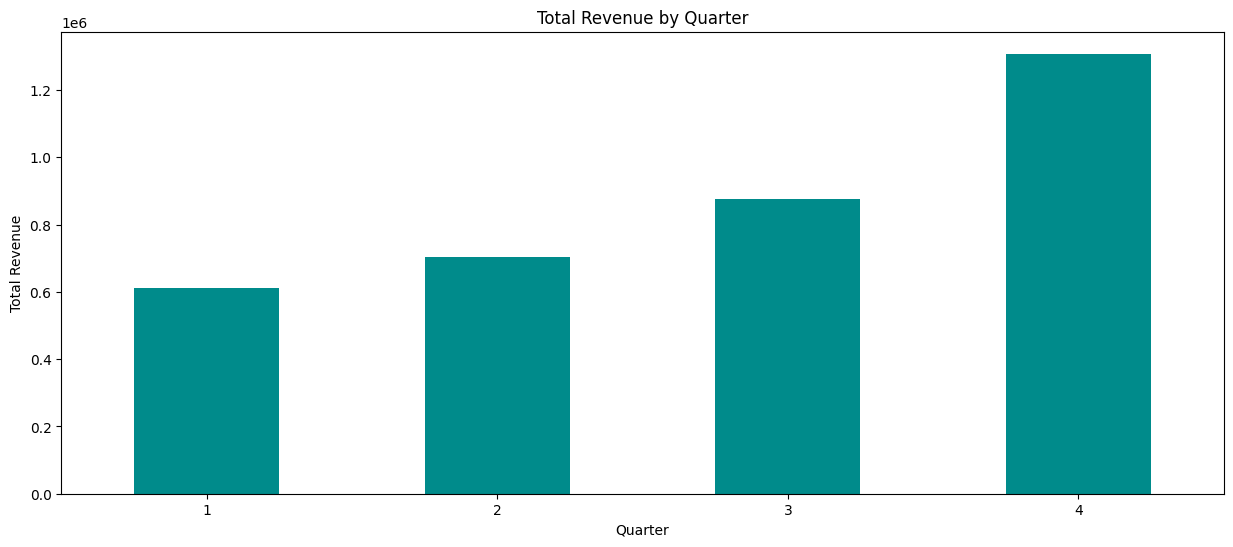

In [ ]:
# Total revenue by quarter
quarterly_revenue = data.groupby('quarter')['Revenue'].sum()
quarterly_revenue.plot(kind='bar', color='DarkCyan', figsize=(15, 6))
plt.title('Total Revenue by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()

The bar chart presents the total revenue generated per quarter, showcasing a consistent upward trend throughout the year. The first and second quarters recorded relatively stable revenue levels, followed by a significant increase in Q3 and a sharp surge in Q4.

The substantial revenue growth in Q4 could be attributed to seasonal sales events, holiday shopping behavior, or strategic marketing campaigns that drive higher purchase volumes. This trend is common in e-commerce, where customers tend to spend more during major sales periods such as Black Friday, Cyber Monday, and Christmas promotions.

# Analysis by Country

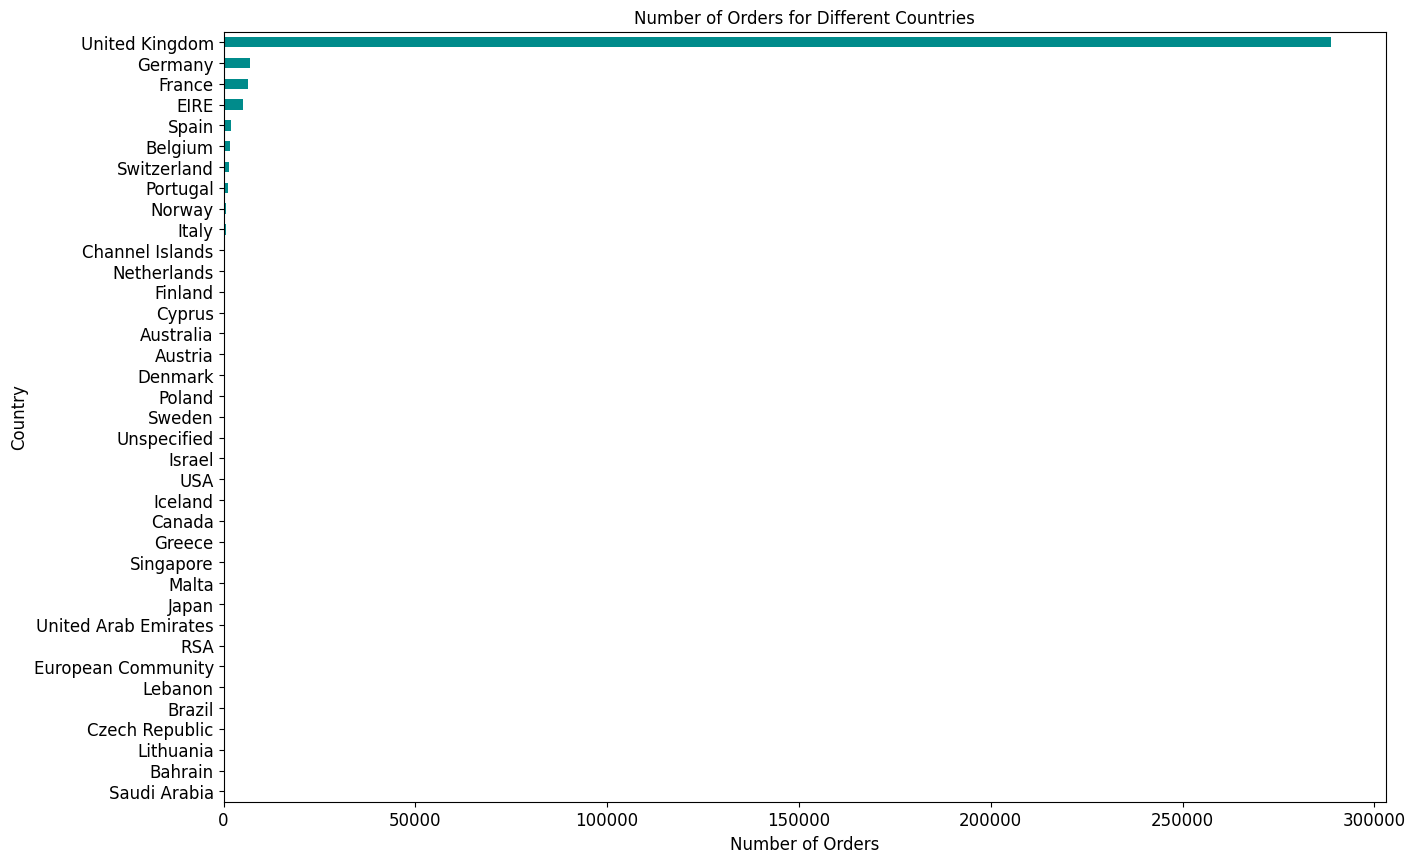

In [ ]:
group_country_orders = data.groupby('Country')['InvoiceDate'].count().sort_values()

# Plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,10))
group_country_orders.plot(kind='barh', fontsize=12, color='DarkCyan')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for Different Countries', fontsize=12)
plt.show()

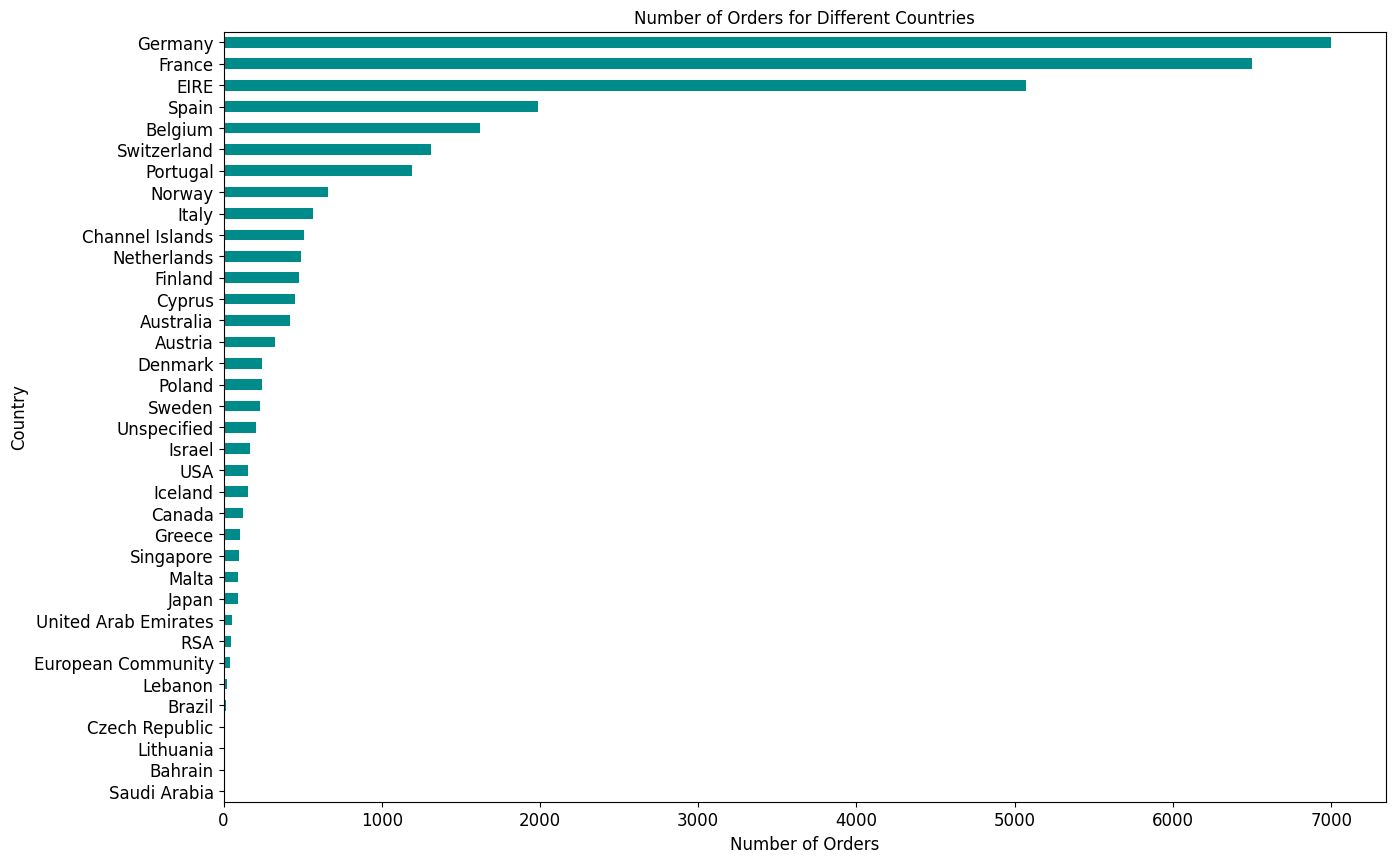

In [ ]:
# Without UK
group_country_orders_without_uk = group_country_orders.copy()
del group_country_orders_without_uk['United Kingdom']

# Plot number of unique customers in waxh country (without UK)
plt.subplots(figsize=(15,10))
group_country_orders_without_uk.plot(kind='barh', fontsize=12, color='DarkCyan')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for Different Countries', fontsize=12)
plt.show()

Based on the graph above, the highest number of orders comes from customers in three European countries: Germany, France, and Ireland. However, upon closer analysis, other countries also show a considerable number of orders. Even some countries in Asia, such as Japan and Singapore, contribute to the total orders, although not as much as European countries. This indicates that market expansion, especially outside of Europe, remains a viable opportunity.

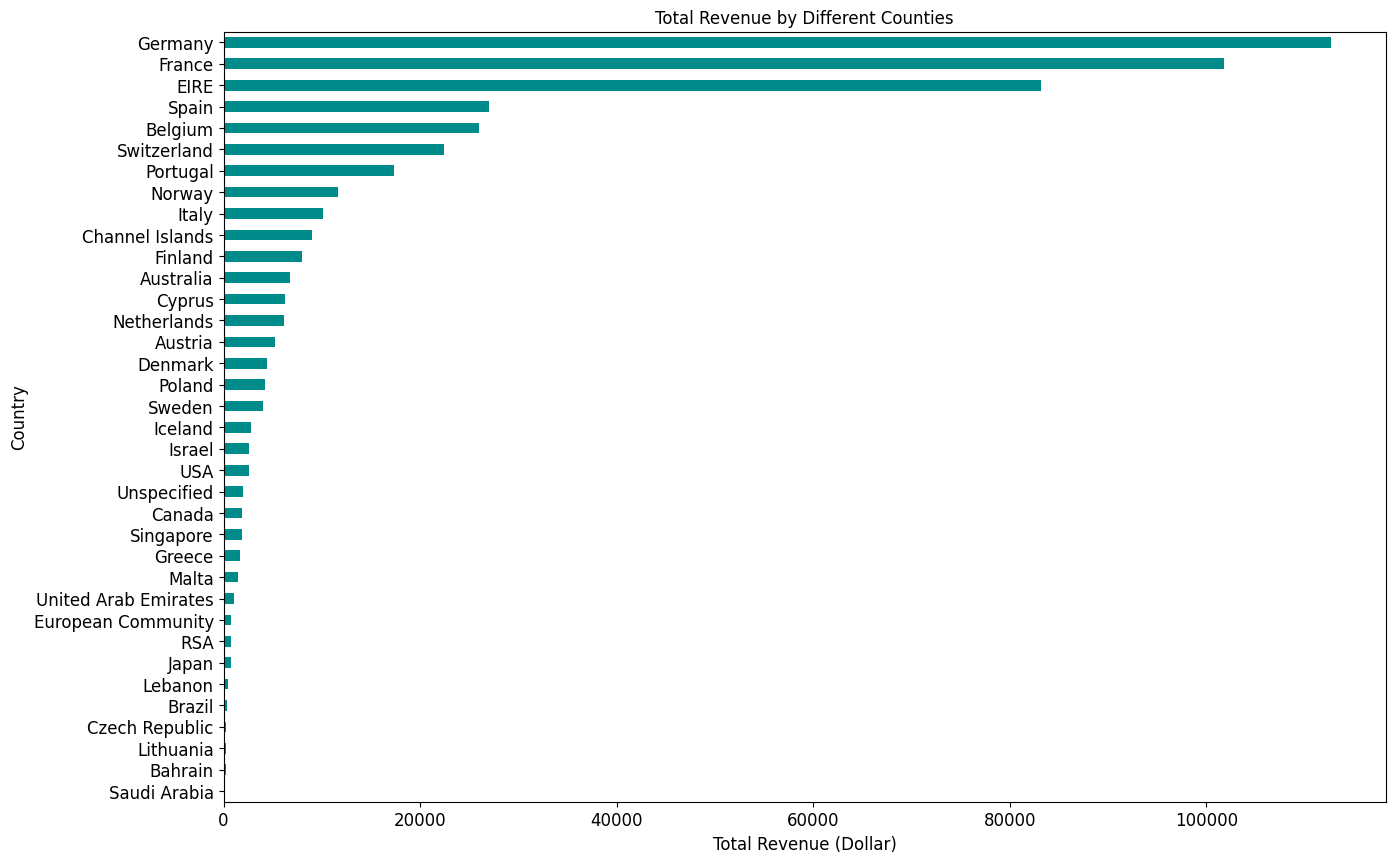

In [ ]:
# Amount spent by each country (without UK)
group_revenue_per_country = data.groupby('Country')['Revenue'].sum().sort_values()
del group_revenue_per_country['United Kingdom']

# Plot total spent by each country (Without UK)
plt.subplots(figsize=(15,10))
group_revenue_per_country.plot(kind='barh', fontsize=12, color='DarkCyan')
plt.xlabel('Total Revenue (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Total Revenue by Different Counties', fontsize=12)
plt.show()

The graph presents total revenue by country, with the Netherlands, Ireland, Germany, France, and Australia being the largest contributors. The dominance of European countries is evident, although some non-European countries, such as Japan and Singapore, also appear on the list, indicating potential growth opportunities in the Asia-Pacific region. Meanwhile, the presence of the "Unspecified" category suggests transaction data without clear location information, which may be due to data entry errors. Additionally, countries with lower revenue, such as Brazil and Bahrain, may have less developed markets or face challenges in distribution and demand. Overall, the graph provides an overview of revenue distribution across regions, highlighting both opportunities and challenges in different markets.

# RFM Analysis

In [ ]:
import datetime as dt

In [ ]:
# Define the reference date (assumed as the last date in the dataset)
data['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
reference_date = dt.datetime(2011,12,10)

This step is part of the Recency (R) calculation in RFM analysis, where "data['InvoiceDate'].max( )" is used to retrieve the latest transaction date in the dataset as the calculation basis, followed by the variable "reference_date = dt.datetime(2011,12,10)" which sets the reference date to one day after the latest transaction to ensure all customers have a positive or zero Recency value, and the "reference_date" value is then used to calculate the difference between the reference date and the customer's last transaction date, resulting in the Recency value that indicates how recently a customer made their last transaction.

In [ ]:
# Calculate RFM Metrics for Each Customer
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate' : lambda x: (reference_date - x.max()).days,
    'InvoiceNo' : 'count',
    'Revenue' : 'sum'
}).reset_index()

In [ ]:
rfm

,CustomerID,InvoiceDate,InvoiceNo,Revenue
0,12347.0,2,155,2783.37
1,12348.0,248,6,90.20
2,12349.0,18,56,924.75
3,12350.0,310,16,294.40
4,12352.0,36,66,1130.94
...,...,...,...,...
4141,18280.0,277,8,137.00
4142,18281.0,180,5,46.92
4143,18282.0,7,8,113.13
4144,18283.0,3,717,2002.63


In [ ]:
# Rename Columns for Clarity
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [ ]:
rfm

,CustomerID,Recency,Frequency,Monetary
0,12347.0,2,155,2783.37
1,12348.0,248,6,90.20
2,12349.0,18,56,924.75
3,12350.0,310,16,294.40
4,12352.0,36,66,1130.94
...,...,...,...,...
4141,18280.0,277,8,137.00
4142,18281.0,180,5,46.92
4143,18282.0,7,8,113.13
4144,18283.0,3,717,2002.63


# Normalizing RFM Scores

In [ ]:
# Normalize RFM Scores Using Quintiles (1-5)
rfm['R'] = pd.qcut(rfm['Recency'], 5, labels = [5, 4, 3, 2, 1])
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method = 'first'), 5, labels = [1, 2, 3, 4, 5])
rfm['M'] = pd.qcut(rfm['Monetary'], 5, labels = [1, 2, 3, 4, 5])

In [ ]:
# Compute the Combined RFM Score
rfm['RFM_Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

In the RFM (Recency, Frequency, Monetary) analysis, normalization is essential to ensure each dimension is on a comparable scale, enabling more accurate segmentation.

Why use qcut?

1. **qcut** is applied to divide data into five balanced quantiles, preventing skewed distributions in segmentation.

2. For Recency, lower values indicate better engagement, so higher scores (5) are assigned to customers with the lowest recency.

3. Frequency is first ranked using **.rank(method='first')** to ensure a more evenly distributed segmentation before applying **qcut**.

4. Monetary is directly divided into quantiles, reflecting each customer's contribution to revenue.

# Customer Segmentation Based on RFM Scores

In [ ]:
# Define Customer Segments Based on RFM Scores
def segment_customer(row):
  if row['RFM_Score'] in ['555', '545', '544', '535', '533']:
    return 'Highly Retained'
  elif row['RFM_Score'][0] in ['4', '5'] and row['RFM_Score'][1] in ['3', '4', '5']:
    return 'Retained Customer'
  elif row['RFM_Score'][0] in ['2', '3'] and row['RFM_Score'][1] in ['2', '3']:
    return 'At Risk'
  elif row['RFM_Score'][0] in ['1', '2'] and row['RFM_Score'][1] in ['1', '2']:
    return 'Churned Customer'
  else:
    return 'Average Customer'

rfm['Customer_Segment'] = rfm.apply(segment_customer, axis = 1)

In [ ]:
rfm

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score,Customer_Segment
0,12347.0,2,155,2783.37,5,5,5,555,Highly Retained
1,12348.0,248,6,90.20,1,1,1,111,Churned Customer
2,12349.0,18,56,924.75,4,4,4,444,Retained Customer
3,12350.0,310,16,294.40,1,2,3,123,Churned Customer
4,12352.0,36,66,1130.94,3,4,4,344,Average Customer
...,...,...,...,...,...,...,...,...,...
4141,18280.0,277,8,137.00,1,1,1,111,Churned Customer
4142,18281.0,180,5,46.92,1,1,1,111,Churned Customer
4143,18282.0,7,8,113.13,5,1,1,511,Average Customer
4144,18283.0,3,717,2002.63,5,5,5,555,Highly Retained


In [ ]:
# Count Customers in Each Segment
segment_counts = rfm['Customer_Segment'].value_counts()

After normalizing the scores, customers are categorized into five key segments based on their RFM_Score.

Rule-based segmentation is applied to classify customers into:

1. Highly Retained: Highest scores (555, 545, etc.), indicating strong loyalty and frequent purchases.

2. Retained Customer: High Recency and Frequency, meaning they are still actively shopping.

3. At Risk: Mid-range scores, indicating customers who are decreasing in engagement.

4. Churned Customer: Low scores, representing customers who have stopped purchasing.

5. Average Customer: Customers with inconsistent shopping patterns that do not strongly fit other categories.

# Customer Segmentation Analysis

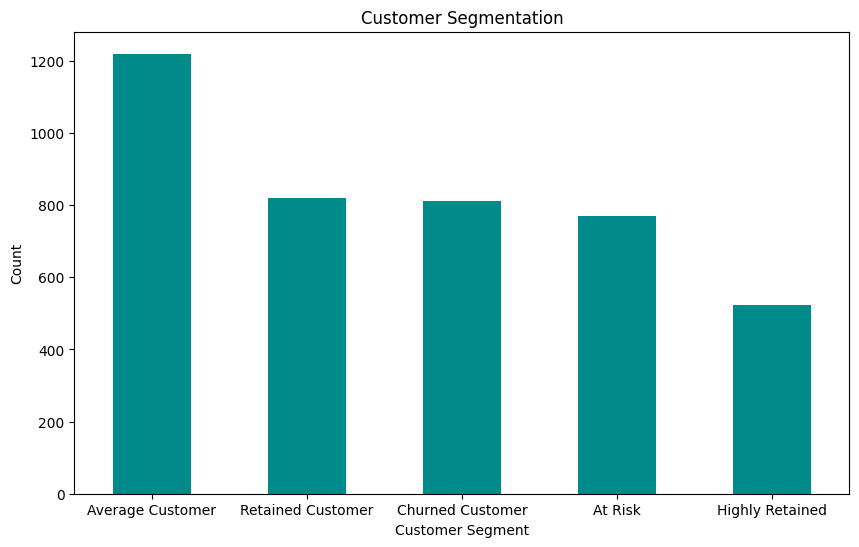

In [ ]:
# Visualize Customer Segmentation
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar', color='DarkCyan')
plt.title('Customer Segmentation')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Customer segmentation analysis reveals low customer loyalty on this e-commerce platform. The "Highly Retained" segment is minimal, indicating that only a small fraction of customers consistently make purchases with high frequency and transaction value. This highlights the need for an improved retention strategy.

Additionally, the churn risk is significant, as evidenced by the large number of customers in the "At Risk" and "Churned Customer" segments. Many customers have reduced their purchase frequency or have not made transactions for an extended period, posing a risk of losing them unless effective retention measures are implemented promptly.

The majority of customers fall into the "Average Customer" segment, meaning they shop irregularly and exhibit weak brand loyalty. This presents an opportunity to enhance customer engagement and purchase frequency through more targeted and effective marketing strategies.

# Key Insights
**1. Geographic Revenue Distribution**

---
While the majority of customers are from European markets, non-European regions like Japan and Singapore also contribute significantly. Japan, in particular, stands out with higher-than-expected revenue, suggesting strong market potential beyond Europe. This presents an opportunity for strategic expansion into these non-European markets.

**2. Retention and Loyalty Insights**

---
The customer retention data indicates low loyalty levels, with only a small
percentage categorized as “Highly Retained.” A large proportion of customers are either “At Risk” or “Churned,” and most customers fall into the “Average Customer” category with irregular purchase behavior.

# Recommended Actions
**1. Deep-Dive Customer Segmentation**

---
Conduct an in-depth segmentation study for Japan and Singapore to understand customer behavior, preferences, and key demographics. This will provide actionable insights for tailoring expansion strategies.

**2. Market Trend Analysis**


---
Analyze sales growth and trends in Japan and Singapore, identifying patterns in purchasing, seasonality, and external influences. This analysis should be compared to European markets to assess the long-term viability of expanding in these regions.

**3. Localized Loyalty Programs**


---
Implement a data-driven loyalty program that caters to customer preferences in different regions. Offer personalized incentives such as points-based rewards, exclusive discounts, or cashback tailored to specific customer behaviors. This strategy should be A/B tested across different customer segments.

**4. Proactive Churn Prevention**


---
Leverage predictive analytics to identify early warning signs of churn. Implement automated customer engagement tactics such as personalized retention emails, AI-driven product recommendations, and limited-time offers targeted at customers exhibiting reduced purchase frequency.

**5. Optimize Customer Experience Across Markets**


---
Conduct UX/UI improvements on the e-commerce platform, ensuring seamless navigation, localized payment methods, and language support for key international markets. A/B testing different site layouts and checkout experiences can further optimize conversion rates.